<a href="https://colab.research.google.com/github/rlawogus1115/test/blob/main/3_DT_lab_ipynb_%EC%86%94%EB%A3%A8%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Decision Tree & Ensemble</h1>

<h1>Decision Tree</h1>


# import

In [ ]:
pip install pycaret

In [5]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_digits, load_boston, load_breast_cancer
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# 심장병 분류
가슴통증, 혈액순환, 동맥경화를 조건으로 심장병을 분류하는 예제

*  dataset

가슴통증 | 혈액순환 | 동맥경화| 심장질환
---|---|---|---
yes | yes | yes| yes
yes | yes | no| no
no | no | yes | no
no| yes|yes | no
yes|yes|no|no
yes |no|yes| no
no|no|yes|no
no| yes| no| no

# Gini

In [ ]:
from sklearn.tree import DecisionTreeClassifier

data = np.array([[1,1,1,1],
                 [1,1,0,0],
                 [0,0,1,0],
                 [0,1,1,0],
                 [1,1,0,0],
                 [1,0,1,0],
                 [0,0,1,0],
                 [0,1,0,0]])
X = data[:, :-1]
y = data[:, -1]
print(X, y)

tree_gini = DecisionTreeClassifier(criterion='gini')
tree_gini.fit(X, y)
print('acc:', tree_gini.score(X, y))
print(tree_gini.predict(X))

[[1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]] [1 0 0 0 0 0 0 0]
acc: 1.0
[1 0 0 0 0 0 0 0]


# 트리 시각화
* pydot
    * pip install pydot
* grphviz
    * 실행파일 설치 : https://graphviz.gitlab.io/download/
        * windows : https://graphviz.gitlab.io/_pages/Download/Download_windows.html
    * `pip install graphviz`

In [ ]:
!pip install pydot graphviz

In [ ]:
import pydot
import graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from sklearn.tree import export_graphviz
import os

#os.environ['PATH'] = "c:/Program Files (x86)/Graphviz2.38/bin"

def showTree(dt, feature_names=None, class_names=None):
    dot_data = StringIO()
    export_graphviz(dt,
                    out_file=dot_data,
                    feature_names=feature_names,
                    class_names=class_names)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
    display(graphviz.Source(graph))

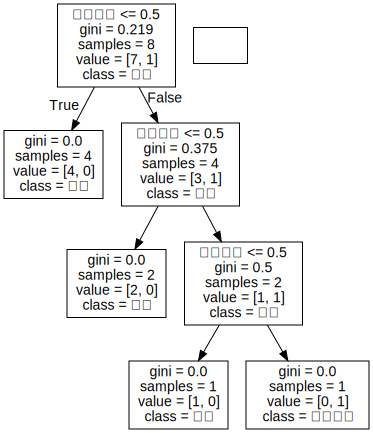

In [ ]:
showTree(tree_gini, ['가슴통증', '혈액순환', '동맥경화'], ['정상', '심장질환'])

# Entropy
$  \displaystyle -\sum_{i=1}^m p_i \cdot log(p_i) = \sum_{i=1}^m p_i \cdot -log(p_i)$ 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """


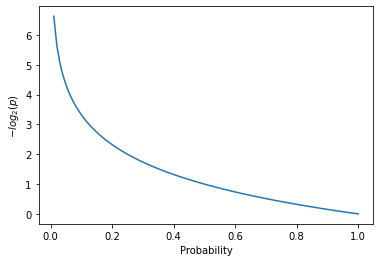

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log2
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, '$log_2(p)$')

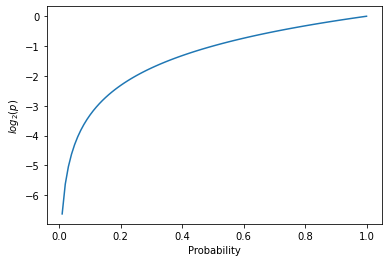

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0, 1, 100)
log_p = -np.log2(p)

plt.plot(p, log_p)
plt.xlabel('Probability')
plt.ylabel('$-log_2(p)$')
plt.show()
log_pp = np.log2(p)

plt.plot(p, log_pp)
plt.xlabel('Probability')
plt.ylabel('$log_2(p)$')

## entropy 실습

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier


data = np.array([[1,1,1,1],
                 [1,1,0,0],
                 [0,0,1,0],
                 [0,1,1,0],
                 [1,1,0,0],
                 [1,0,1,0],
                 [0,0,1,0],
                 [0,1,0,0]])

X = data[:, :-1]
y = data[:, -1]
print(X, y)

tree_ent = DecisionTreeClassifier(criterion='entropy')
tree_ent.fit(X, y)

print('Acc:', tree_ent.score(X, y))


[[1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]] [1 0 0 0 0 0 0 0]
Acc: 1.0


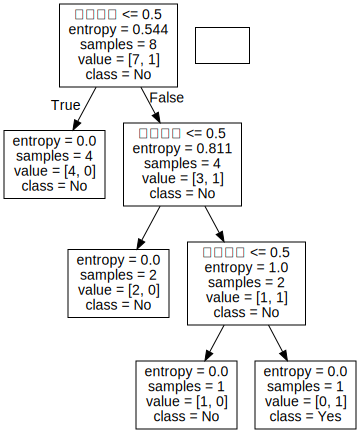

In [ ]:
showTree(tree_ent, ["가슴통증", "혈액순환", "동맥경화"], ["No", "Yes"])

# Max Depth
### Breaset Cancer

In [ ]:
from sklearn import model_selection
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

seed = 42
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = model_selection.train_test_split(cancer.data,
                                                        cancer.target,
                                                        stratify=cancer.target,
                                                        random_state=seed
                                                        )

for depth in [None, 4]:
  tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
  tree.fit(X_train, y_train)
  acc_train = tree.score(X_train, y_train)
  acc_test = tree.score(X_test, y_test)

  print('depth:', depth, 'Train Acc:', acc_train, 'Test acc:', acc_test)

depth: None Train Acc: 1.0 Test acc: 0.9370629370629371
depth: 4 Train Acc: 0.9882629107981221 Test acc: 0.951048951048951


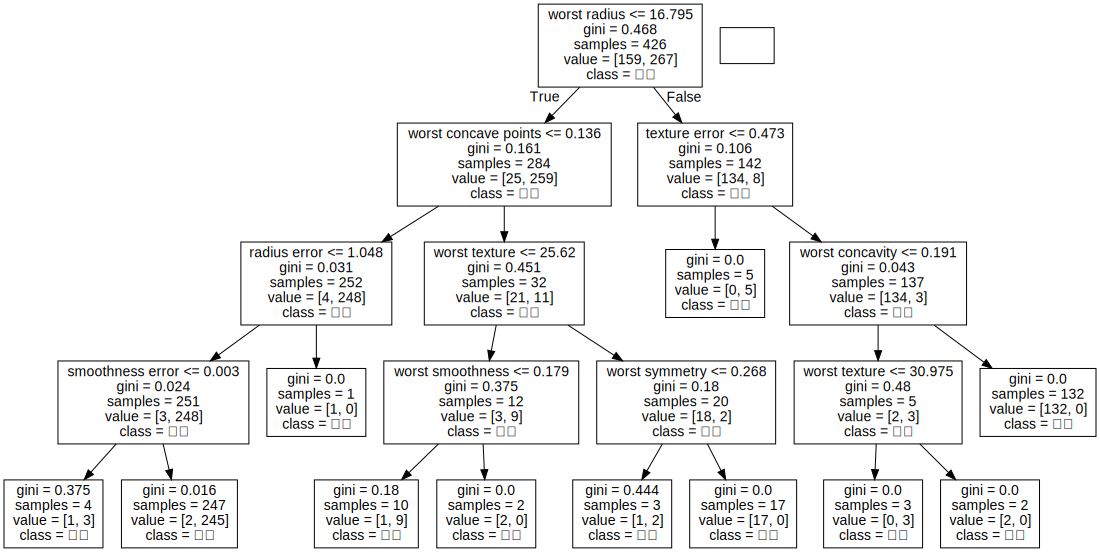

In [ ]:
showTree(tree, cancer.feature_names, ['악성', '양성'])

## Feature importances 시각화

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


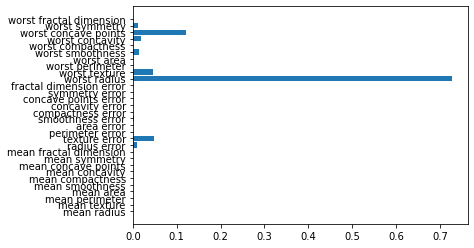

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print(tree.feature_importances_)
plt.barh(range(0, len(cancer.feature_names)), tree.feature_importances_, align='center')
_ = plt.yticks(np.arange(len(cancer.feature_names)), cancer.feature_names)

# Regression Tree(회귀 트리)

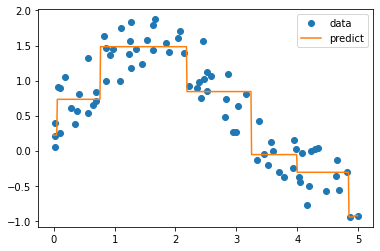

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

n = 80
X = np.sort(5 * np.random.rand(n, 1), axis=0)
y = np.sin(X).ravel() + np.random.rand(n)

regtree = DecisionTreeRegressor(max_depth=3)
regtree.fit(X, y)

X_test = np.arange(0, 5, 0.01)[:, np.newaxis]
y_pred = regtree.predict(X_test)

plt.plot(X, y, 'o', label='data')
plt.plot(X_test, y_pred, label='redcit')

## Regression Tree 보스턴 주택 가격

In [ ]:
from sklearn.tree import DecisionTreeRegressor
boston = load_boston()
X = StandardScaler().fit_transform(boston.data)

#X_train, X_test, y_train, y_test = train_test_split(X, boston.target, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=1)

regtree = DecisionTreeRegressor(max_depth=5, random_state=0)
regtree.fit(X_train, y_train)
r2_train = regtree.score(X_train, y_train)
r2_test = regtree.score(X_test, y_test)
print('Train r2:', r2_train, 'Test r2:', r2_test)


Train r2: 0.9204825770764915 Test r2: 0.8763987309111113


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# Ensemble(앙상블) 기법


## Voting
* 유방암 데이터 실습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

cancer = datasets.load_breast_cancer()
X = StandardScaler().fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(X, cancer.target, random_state=0)

lr_clf = LogisticRegression()
knn = KNeighborsClassifier(8)
dt = DecisionTreeClassifier(max_depth=5, random_state=0)

voting = VotingClassifier([('lr', lr_clf), ('knn', knn), ('dt', dt)], voting='hard')

for clf in [voting, lr_clf, knn, dt]:
  clf.fit(X_train, y_train)
  acc = clf.score(X_test, y_test)
  print(f'{clf.__class__.__name__}, acc:{acc}')




VotingClassifier, acc:0.958041958041958
LogisticRegression, acc:0.965034965034965
KNeighborsClassifier, acc:0.9440559440559441
DecisionTreeClassifier, acc:0.8951048951048951


## Bagging, RandomForest
* 숫자 손글씨 실습

In [ ]:
from sklearn.ensemble import RandomForestClassifier

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

forest = RandomForestClassifier(n_estimators=300, random_state=0, max_depth=10)
dt = DecisionTreeClassifier(max_depth=10)

for clf in [dt, forest]:
  clf.fit(X_train, y_train)
  acc_train = clf.score(X_train, y_train)
  acc_test = clf.score(X_test, y_test)

  print(f'{clf.__class__.__name__}, Train acc:{acc_train}, Test acc:{acc_test}')

DecisionTreeClassifier, Train acc:0.9784706755753526, Test acc:0.8355555555555556
RandomForestClassifier, Train acc:1.0, Test acc:0.9777777777777777


## Boosting


### Boosting 숫자 손글씨 실습

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

digits = load_digits()
X = MinMaxScaler().fit_transform(digits.data)
X_train, X_test, y_train, y_test = train_test_split(X, digits.target, random_state=1)


ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=100)
gbm = GradientBoostingClassifier()

for clf in [ada, gbm]:
  clf.fit(X_train, y_train)
  acc_train = clf.score(X_train, y_train)
  acc_test = clf.score(X_test, y_test)
  print(clf.__class__.__name__, 'train acc:', acc_train, 'test acc:', acc_test)

AdaBoostClassifier train acc: 1.0 test acc: 0.98
GradientBoostingClassifier train acc: 1.0 test acc: 0.9533333333333334


### Boosting 보스턴 주택가격 실습

In [24]:
boston = load_boston()
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df["MEDV"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
reg_test_1 = setup(data=df,target="MEDV")

,Description,Value
0,session_id,1283
1,Target,MEDV
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 13)"


In [26]:
best = compare_models(sort='mse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.2639,10.3482,3.1510,0.8759,0.1493,0.1191,0.095
et,Extra Trees Regressor,2.1671,10.6293,3.1745,0.8708,0.1404,0.1089,0.438
rf,Random Forest Regressor,2.3059,11.1229,3.2993,0.8671,0.1500,0.1174,0.532
lightgbm,Light Gradient Boosting Machine,2.4494,12.1095,3.4300,0.8534,0.1590,0.1241,0.073
ada,AdaBoost Regressor,2.7674,13.7438,3.6349,0.8325,0.1749,0.1479,0.097
dt,Decision Tree Regressor,2.9454,19.4777,4.2695,0.7806,0.1983,0.1555,0.020
lr,Linear Regression,3.5191,24.6464,4.9225,0.7173,0.2941,0.1861,0.514
ridge,Ridge Regression,3.5027,24.8002,4.9322,0.7159,0.2946,0.1855,0.044
br,Bayesian Ridge,3.5437,25.2890,4.9784,0.7108,0.2937,0.1868,0.015
lar,Least Angle Regression,3.6095,25.4373,5.0126,0.7047,0.3056,0.1908,0.016


In [27]:
best

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1283, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
best_tune = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2617,9.2501,3.0414,0.8982,0.1350,0.1053
1,2.4134,15.3859,3.9225,0.7735,0.1230,0.0953
2,2.1191,7.9882,2.8263,0.8724,0.1352,0.1095
3,2.3400,10.3098,3.2109,0.8992,0.1470,0.1154
4,2.4911,8.2437,2.8712,0.9146,0.1436,0.1258
5,2.2272,8.8051,2.9673,0.9055,0.1502,0.1191
6,2.5209,12.2410,3.4987,0.9016,0.1748,0.1318
7,3.2941,22.7504,4.7697,0.7592,0.2336,0.1984
8,1.7220,5.9459,2.4384,0.8962,0.1151,0.0843


In [29]:
evaluate_model(best_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
predict_model(best_tune)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.963,27.6861,5.2618,0.61,0.2087,0.1563


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_0.0,MEDV,Label
0,0.03150,95.0,1.470000,0.403,6.975,15.300000,7.6534,3.0,402.0,17.000000,396.899994,4.56,1.0,34.900002,33.765649
1,0.22188,20.0,6.960000,0.464,7.691,51.799999,4.3665,3.0,223.0,18.600000,390.769989,6.58,0.0,35.200001,39.193940
2,0.32982,0.0,21.889999,0.624,5.822,95.400002,2.4699,4.0,437.0,21.200001,388.690002,15.03,1.0,18.400000,17.090594
3,0.03615,80.0,4.950000,0.411,6.630,23.400000,5.1167,4.0,245.0,19.200001,396.899994,4.70,1.0,27.900000,28.634636
4,0.40202,0.0,9.900000,0.544,6.382,67.199997,3.5325,4.0,304.0,18.400000,395.209991,10.36,1.0,23.100000,23.051702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,9.82349,0.0,18.100000,0.671,6.794,98.800003,1.3580,24.0,666.0,20.200001,396.899994,21.24,1.0,13.300000,16.987132
148,7.02259,0.0,18.100000,0.718,6.006,95.300003,1.8746,24.0,666.0,20.200001,319.980011,15.70,1.0,14.200000,17.170513
149,0.04741,0.0,11.930000,0.573,6.030,80.800003,2.5050,1.0,273.0,21.000000,396.899994,7.88,1.0,11.900000,18.310627
150,0.05561,70.0,2.240000,0.400,7.041,10.000000,7.8278,5.0,358.0,14.800000,371.579987,4.74,1.0,29.000000,34.212708


In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

boston = load_boston()
X = StandardScaler().fit_transform(boston.data)
X_train, X_test, y_train, y_test = train_test_split(X, boston.target)


ada_reg = AdaBoostRegressor()
gbm_reg = GradientBoostingRegressor()

for reg in [ada_reg, gbm_reg]:
  reg.fit(X_train,y_train)
  r2_train = reg.score(X_train, y_train)
  r2_test = reg.score(X_test, y_test)

  print(reg.__class__.__name__, 'Train r2:', r2_train, 'Test r2:', r2_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

AdaBoostRegressor Train r2: 0.916198821743207 Test r2: 0.8250349949062783
GradientBoostingRegressor Train r2: 0.9824956535192202 Test r2: 0.852413479084673


## Stacking
### 유방암 데이터 실습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

knn = KNeighborsClassifier(4)
rf = RandomForestClassifier(random_state=0)
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier()
estimators=[('knn', knn), ('rf', rf), ('dt', dt), ('ada', ada)]

lr = LogisticRegression()
stacking = StackingClassifier(estimators, final_estimator=lr)
stacking.fit(X_train, y_train)
print('stacking score: ', stacking.score(X_test, y_test))

for clr in [knn, rf, dt, ada, lr]:
  clr.fit(X_train, y_train)
  print(clr.__class__.__name__, clr.score(X_test, y_test))

stacking score:  0.965034965034965
KNeighborsClassifier 0.9230769230769231
RandomForestClassifier 0.972027972027972
DecisionTreeClassifier 0.8881118881118881
AdaBoostClassifier 0.9790209790209791
LogisticRegression 0.958041958041958


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
knn = KNeighborsClassifier(4)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier(n_estimators=100)
for m in  [knn, rf, dt, ada]:
  m.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)
ada_pred = ada.predict(X_test)

print(f'KNN Accuracy: {accuracy_score(y_test, knn_pred):.4f}')
print(f'RandomForest Accuracy: {accuracy_score(y_test, rf_pred):.4f}')
print(f'DTree Accuracy: {accuracy_score(y_test, dt_pred):.4f}')
print(f'AdaBoost Accuracy: {accuracy_score(y_test, ada_pred):.4f}')
preds = np.array([knn_pred, rf_pred, dt_pred, ada_pred]).T
lr = LogisticRegression(C=10)
lr.fit(preds, y_test)
print(f'Final Accuracy: {lr.score(preds, y_test):.4f}')


KNN Accuracy: 0.9231
RandomForest Accuracy: 0.9720
DTree Accuracy: 0.8741
AdaBoost Accuracy: 0.9860
Final Accuracy: 0.9860


## XGBoost(eXtra Gradient Boost)
* GBM의 단점인 느린 수행 시간 해결
* 과적합 규제(Regularization) 가능
* 자체적인 교차 검증 수행
* 설치 : `pip install xgboost`
* 별도의 패키지이지만 sklearn용 래퍼(wrapper) 제공
  * `XGBClassifier`, `XGBRegressor` 
* https://xgboost.readthedocs.io/en/latest/index.html
* https://github.com/dmlc/xgboost

### XGBoost 위스콘신 유방암 분류

In [ ]:
import xgboost as xgb

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)
print('Train acc:', acc_train, "Test acc:", acc_test)

Train acc: 1.0 Test acc: 0.9790209790209791


### XGBoost boston 주택 가격 회귀

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_validate
boston = load_boston()
X = StandardScaler().fit_transform(boston.data)
X_train, X_test, y_train, y_test = train_test_split(X, boston.target, random_state=0)

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)
print('Train r2:', r2_train, "Test r2:", r2_test)

cross_val = cross_validate(estimator=model,X=X,y=boston.target,cv=5)

print(cross_val['fit_time'].mean())
print(cross_val['score_time'].mean())
print(cross_val['test_score'].mean())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

[00:27:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2: 0.9805003234686828 Test r2: 0.7668533790548064
[00:27:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.12019462585449218
0.003907060623168946
0.6828491019063226


## LightGBM
* 여전히 오래 걸리는 XGBoost 개선
  * 빠른 학습과 예측
  * 적은 메모리 사용
* 단점 : 적은 데이터 학습에서 과접한 발생이 쉽다.
  * 10,000건 이상의 샘플 권장
* 설치 : `pip install lightgbm`
* sklearn 래퍼 클래스
  * `LGBMClassifier`, `LGBMRegressor`
* 참조 : https://lightgbm.readthedocs.io/en/latest/


###### LGBM 유방암분류

In [ ]:
from lightgbm import LGBMClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)


train score: 1.0 test score: 0.972027972027972


###### LGBM 보스턴 주택가격 회귀

In [ ]:
from lightgbm import LGBMRegressor

boston = load_boston()
X = StandardScaler().fit_transform(boston.data)
X_train, X_test, y_train, y_test = train_test_split(X, boston.target, random_state=0)



Train R2:0.9757474489930561, Test R2:0.7438280827089574


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.